<a href="https://colab.research.google.com/github/Esmreety/Image-Classification/blob/master/Cat_vs_Dog_Classifier_with_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import backend as k
import numpy as np
from keras.preprocessing import image
from keras.optimizers import RMSprop

In [ ]:
img_width, img_height = 150, 150
train_data_dir = '/content/cats_and_dogs_filtered/train'
validation_data_dir = '/content/cats_and_dogs_filtered/validation'
batch_size = 20


In [ ]:
train_datagen = ImageDataGenerator(
                     rescale = 1./255,
                     rotation_range = 40, 
                     width_shift_range = 0.2,
                     height_shift_range = 0.2,
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     horizontal_flip = True,
                     fill_mode = 'nearest')
              
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
                              train_data_dir,
                              target_size = (img_width, img_height),
                              batch_size = batch_size,
                                class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                                validation_data_dir,
                                target_size = (img_width, img_height),
                                batch_size = batch_size,
                                class_mode = 'binary')
                                                              


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential()
input_shape = (img_width, img_height, 3)
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5)),
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = RMSprop(lr=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
 history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100, # 2000 images = batch_size * steps
    epochs = 100,
    validation_data = validation_generator,
    verbose = 2,
    validation_steps = 50) #1000 images = batch_size*steps
model.save_weights('classifier1.h5')

Epoch 1/100
 - 26s - loss: 0.6945 - accuracy: 0.5170 - val_loss: 0.7023 - val_accuracy: 0.5990
Epoch 2/100
 - 19s - loss: 0.6843 - accuracy: 0.5545 - val_loss: 0.6905 - val_accuracy: 0.6200
Epoch 3/100
 - 18s - loss: 0.6758 - accuracy: 0.5755 - val_loss: 0.6489 - val_accuracy: 0.6400
Epoch 4/100
 - 18s - loss: 0.6735 - accuracy: 0.5860 - val_loss: 0.5579 - val_accuracy: 0.6520
Epoch 5/100
 - 18s - loss: 0.6545 - accuracy: 0.6325 - val_loss: 0.6356 - val_accuracy: 0.6650
Epoch 6/100
 - 17s - loss: 0.6366 - accuracy: 0.6390 - val_loss: 0.5493 - val_accuracy: 0.6840
Epoch 7/100
 - 17s - loss: 0.6245 - accuracy: 0.6380 - val_loss: 0.5868 - val_accuracy: 0.6690
Epoch 8/100
 - 19s - loss: 0.6153 - accuracy: 0.6640 - val_loss: 0.7262 - val_accuracy: 0.6740
Epoch 9/100
 - 17s - loss: 0.6070 - accuracy: 0.6805 - val_loss: 0.6240 - val_accuracy: 0.7060
Epoch 10/100
 - 17s - loss: 0.5843 - accuracy: 0.6950 - val_loss: 0.4939 - val_accuracy: 0.7030
Epoch 11/100
 - 16s - loss: 0.5907 - accuracy: 0.

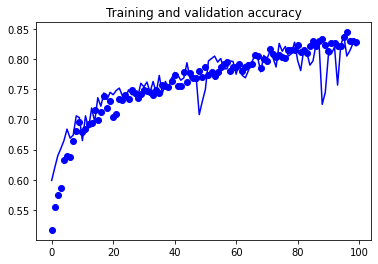

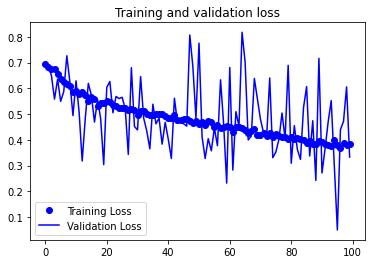

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()